In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import openpyxl
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage

#Show mols in dataframes
from rdkit.Chem import PandasTools
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage
from IPython.core.display import HTML
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit import DataStructs
import os
import sys
from scipy.spatial.distance import pdist, squareform


In [2]:
TOP = os.getcwd().replace('notebooks', '')
raw_dir = TOP + 'data/raw/'
processed_dir = TOP +'data/processed/'
interim_dir = TOP + 'data/interim/'
external_dir = TOP + 'data/external/'
figures_dir = TOP + 'reports/figures/'


In [3]:
df = pd.read_excel(interim_dir+'categorisatons_wscreening_constraints_final_picks_080823.xlsx', index_col = [0])

In [4]:
df[['dtxsid', 'group_str','final_picks']]

,dtxsid,group_str,final_picks
0,DTXSID4063036,"('Acetylides', nan)",NaN
1,DTXSID30870753,"('Acetylides', nan)",NaN
2,DTXSID7062374,"('Acetylides', nan)",NaN
3,DTXSID9061097,"('Acetylides', nan)",1.0
4,DTXSID1061233,"('Acetylides', nan)",NaN
...,...,...,...
14242,DTXSID7070391,"('Triphenyl compounds', nan)",NaN
14243,DTXSID70889405,"('Triphenyl compounds', nan)",1.0
14244,DTXSID90886794,"('Triphenyl compounds', nan)",NaN
14245,DTXSID3073052,"('Triphenyl compounds', nan)",NaN


In [8]:
atg = pd.read_csv(interim_dir+'atg-afp-tsca-full-pred.csv', )

In [9]:
atg

,dtxsid,name,ATG_AP_1_CIS,ATG_AP_2_CIS,ATG_AR_TRANS,ATG_Ahr_CIS,ATG_BRE_CIS,ATG_CAR_TRANS,ATG_CMV_CIS,ATG_CRE_CIS,...,ATG_TAL_CIS,ATG_TA_CIS,ATG_TCF_b_cat_CIS,ATG_TGFb_CIS,ATG_THRa1_TRANS,ATG_VDRE_CIS,ATG_VDR_TRANS,ATG_Xbp1_CIS,ATG_p53_CIS,leverage
0,DTXSID3060164,Benzhydrylbenzene,0.779710,0.078866,0.060122,0.361214,0.688947,0.690899,0.821583,0.340880,...,0.176233,0.231312,0.177881,0.402697,0.051371,0.762570,0.165442,0.355170,0.207589,0.017864
1,DTXSID7060837,"Propane, 1,3-diiodo-",0.651144,0.018653,0.016655,0.429287,0.238095,0.091101,0.023027,0.023428,...,0.162300,0.042953,0.099048,0.754526,0.009011,0.162233,0.005011,0.009590,0.014180,0.101328
2,DTXSID9025879,"3,3'-(p-Phenylene)diacrylic acid",0.565440,0.136848,0.003519,0.652231,0.391343,0.058177,0.062860,0.021602,...,0.006808,0.018646,0.863138,0.021165,0.020885,0.737458,0.038195,0.169650,0.933103,0.091227
3,DTXSID2026282,C.I. Vat brown 3,0.789356,0.178712,0.012944,0.645679,0.689697,0.755852,0.746685,0.791001,...,0.187518,0.852921,0.754918,0.073750,0.531950,0.946755,0.223314,0.802304,0.593171,0.047585
4,DTXSID4052188,"2,5,5-Trimethyl-2-phenyl-1,3-dioxane",0.604843,0.050259,0.066708,0.290074,0.337627,0.137028,0.729840,0.250290,...,0.036441,0.088665,0.037118,0.285498,0.045529,0.570865,0.087767,0.217037,0.209701,0.016739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13288,DTXSID00893636,"(N,N-Dimethylaminopropyl)methyldiethoxysilane",0.631053,0.032380,0.016207,0.260264,0.236902,0.036656,0.169669,0.109323,...,0.116042,0.259102,0.090047,0.025603,0.019270,0.338519,0.067139,0.064381,0.364548,0.054509
13289,DTXSID9063956,Trimethyl(2-propynyloxy)silane,0.018806,0.004179,0.003564,0.122342,0.061161,0.379126,0.107435,0.078569,...,0.023593,0.033903,0.022577,0.011265,0.070212,0.048878,0.016863,0.052459,0.017004,0.037364
13290,DTXSID7065546,"2-Propenal, 3-[4-(1,1-dimethylethyl)phenyl]-2-...",0.061326,0.001785,0.001113,0.089339,0.045869,0.030168,0.013467,0.185792,...,0.126248,0.007729,0.016017,0.077421,0.011358,0.227033,0.101900,0.116651,0.029348,0.023928
13291,DTXSID5064209,2-(Carboxymethylthio)benzothiazole,0.966380,0.430258,0.270207,0.414239,0.859000,0.730816,0.976909,0.750682,...,0.303759,0.678236,0.647581,0.396180,0.177691,0.989221,0.261848,0.590754,0.765250,0.048279


In [11]:
atg_grp = pd.merge(atg, df[['dtxsid', 'group_str','final_picks']], on = 'dtxsid', how = 'left')

In [14]:
atg_grp.iloc[:,:-3]

,dtxsid,name,ATG_AP_1_CIS,ATG_AP_2_CIS,ATG_AR_TRANS,ATG_Ahr_CIS,ATG_BRE_CIS,ATG_CAR_TRANS,ATG_CMV_CIS,ATG_CRE_CIS,...,ATG_Sp1_CIS,ATG_TAL_CIS,ATG_TA_CIS,ATG_TCF_b_cat_CIS,ATG_TGFb_CIS,ATG_THRa1_TRANS,ATG_VDRE_CIS,ATG_VDR_TRANS,ATG_Xbp1_CIS,ATG_p53_CIS
0,DTXSID3060164,Benzhydrylbenzene,0.779710,0.078866,0.060122,0.361214,0.688947,0.690899,0.821583,0.340880,...,0.483177,0.176233,0.231312,0.177881,0.402697,0.051371,0.762570,0.165442,0.355170,0.207589
1,DTXSID7060837,"Propane, 1,3-diiodo-",0.651144,0.018653,0.016655,0.429287,0.238095,0.091101,0.023027,0.023428,...,0.003062,0.162300,0.042953,0.099048,0.754526,0.009011,0.162233,0.005011,0.009590,0.014180
2,DTXSID9025879,"3,3'-(p-Phenylene)diacrylic acid",0.565440,0.136848,0.003519,0.652231,0.391343,0.058177,0.062860,0.021602,...,0.491312,0.006808,0.018646,0.863138,0.021165,0.020885,0.737458,0.038195,0.169650,0.933103
3,DTXSID2026282,C.I. Vat brown 3,0.789356,0.178712,0.012944,0.645679,0.689697,0.755852,0.746685,0.791001,...,0.836622,0.187518,0.852921,0.754918,0.073750,0.531950,0.946755,0.223314,0.802304,0.593171
4,DTXSID4052188,"2,5,5-Trimethyl-2-phenyl-1,3-dioxane",0.604843,0.050259,0.066708,0.290074,0.337627,0.137028,0.729840,0.250290,...,0.190149,0.036441,0.088665,0.037118,0.285498,0.045529,0.570865,0.087767,0.217037,0.209701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13288,DTXSID00893636,"(N,N-Dimethylaminopropyl)methyldiethoxysilane",0.631053,0.032380,0.016207,0.260264,0.236902,0.036656,0.169669,0.109323,...,0.478312,0.116042,0.259102,0.090047,0.025603,0.019270,0.338519,0.067139,0.064381,0.364548
13289,DTXSID9063956,Trimethyl(2-propynyloxy)silane,0.018806,0.004179,0.003564,0.122342,0.061161,0.379126,0.107435,0.078569,...,0.046961,0.023593,0.033903,0.022577,0.011265,0.070212,0.048878,0.016863,0.052459,0.017004
13290,DTXSID7065546,"2-Propenal, 3-[4-(1,1-dimethylethyl)phenyl]-2-...",0.061326,0.001785,0.001113,0.089339,0.045869,0.030168,0.013467,0.185792,...,0.029408,0.126248,0.007729,0.016017,0.077421,0.011358,0.227033,0.101900,0.116651,0.029348
13291,DTXSID5064209,2-(Carboxymethylthio)benzothiazole,0.966380,0.430258,0.270207,0.414239,0.859000,0.730816,0.976909,0.750682,...,0.868545,0.303759,0.678236,0.647581,0.396180,0.177691,0.989221,0.261848,0.590754,0.765250


In [12]:
atg_grp.to_csv(interim_dir+'atg_predicted_250424.csv')

In [15]:
atg_grp = atg_grp.set_index('dtxsid')

In [21]:
#atg_grp

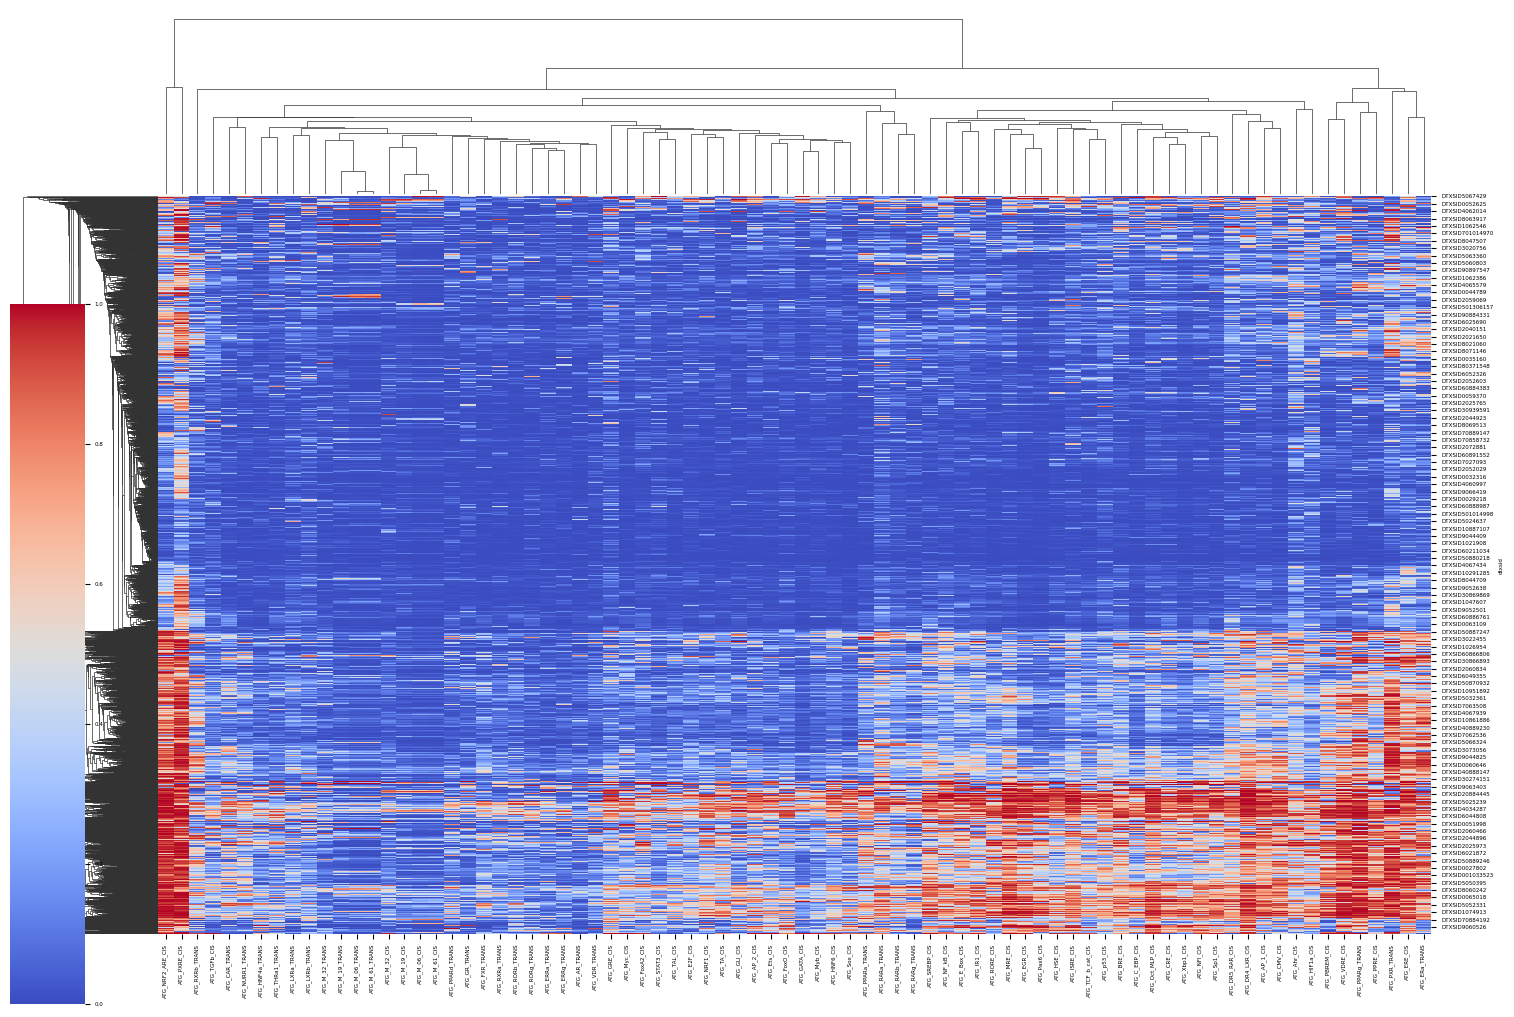

In [23]:

sns.clustermap(atg_grp.iloc[:, 1:-3], cmap='coolwarm', figsize=(15, 10), dendrogram_ratio=(.1, .2), cbar_pos=(0, 0, 0.05, 0.7))

# Adjust font size
plt.rcParams.update({'font.size': 8})


In [20]:
import glob

In [22]:
files = glob.glob(external_dir+'*OPERA*.csv', 
                   recursive = True)


In [23]:
mylst = []
for e in files:
    df = pd.read_csv(e)
    mylst.append(df)
    

In [25]:
opera = pd.concat(mylst)

In [29]:
[e for e in opera.columns if 'pred'  in e]

['FUB_pred',
 'FUB_predRange',
 'Clint_pred',
 'Clint_predRange',
 'CACO2_pred',
 'CACO2_predRange',
 'CERAPP_Ago_pred',
 'CERAPP_Anta_pred',
 'CERAPP_Bind_pred',
 'CoMPARA_Ago_pred',
 'CoMPARA_Anta_pred',
 'CoMPARA_Bind_pred',
 'CATMoS_VT_pred',
 'CATMoS_NT_pred',
 'CATMoS_EPA_pred',
 'CATMoS_GHS_pred',
 'CATMoS_LD50_pred',
 'CATMoS_LD50_predRange']

In [34]:
opera_df = opera[['MoleculeID','CERAPP_Ago_pred',
 'CERAPP_Anta_pred',
 'CERAPP_Bind_pred',
 'CoMPARA_Ago_pred',
 'CoMPARA_Anta_pred',
 'CoMPARA_Bind_pred',
 'CATMoS_VT_pred',
 'CATMoS_NT_pred',
 'CATMoS_EPA_pred',
 'CATMoS_GHS_pred',
 'CATMoS_LD50_pred']]

In [36]:
opera_df = pd.merge(opera_df, df[['dtxsid', 'group_str','final_picks']], left_on = 'MoleculeID', right_on = 'dtxsid', how = 'left')

In [41]:
opera_df.to_csv(interim_dir+'opera_df_tox.csv')

<Axes: ylabel='Frequency'>

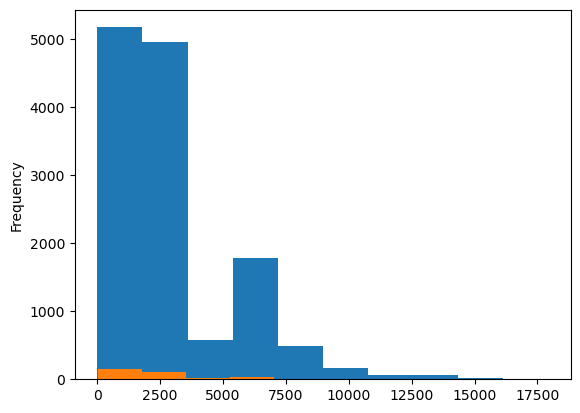

In [40]:
opera_df['CATMoS_LD50_pred'].plot(kind = 'hist')
opera_df[opera_df['final_picks'] ==1]['CATMoS_LD50_pred'].plot(kind = 'hist')